In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
#import wradlib
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
datafile = nc.Dataset('MDV-20150805-084449-PPIVol.nc')

filename = wradlib.util.get_wradlib_data_file('dx/raa00-dx_10908-0806021735-fbg---bin.gz')
print(filename)

In [3]:
#datafile

In [4]:
#datafile.variables

In [5]:
dir(radar)

NameError: name 'radar' is not defined

In [111]:
for i in datafile.variables:
    print(i)

volume_number
latitude
longitude
altitude
time_coverage_start
time_coverage_end
time
azimuth
elevation
radar_antenna_gain_h
radar_antenna_gain_v
radar_beam_width_h
radar_beam_width_v
radar_receiver_bandwidth
frequency
radar_measured_transmit_power_h
radar_measured_transmit_power_v
pulse_width
prt
prt_ratio
nyquist_velocity
n_samples
prt_mode
polarization_mode
range
sweep_number
sweep_mode
fixed_angle
sweep_start_ray_index
sweep_end_ray_index
DBZH
DBZV
VELH
VELV


In [112]:
data_dbz=datafile.variables['DBZH'][:].data

In [113]:
pd.DataFrame(data_dbz)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,10.5,15.0,16.5,18.0,19.5,20.0,24.0,26.0,21.0,18.5,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
1,8.0,14.0,16.5,17.5,19.0,19.5,22.5,24.5,23.5,23.5,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
2,9.5,13.5,15.0,17.0,19.0,21.5,21.0,21.0,23.5,25.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
3,8.0,12.5,16.0,19.5,21.0,24.5,25.5,25.5,25.5,28.0,...,14.0,14.0,13.5,14.5,14.5,15.0,14.5,-32768.0,14.0,15.0
4,9.5,13.0,16.0,19.0,24.0,26.0,23.5,22.0,23.0,24.0,...,-32768.0,14.5,13.5,14.0,14.0,14.0,14.5,16.0,15.5,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,9.5,13.0,14.5,17.0,17.5,19.0,20.5,21.0,20.0,19.5,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
9266,9.0,13.0,14.5,19.0,19.5,22.5,23.5,21.5,19.5,19.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
9267,8.5,11.5,14.0,15.5,17.0,19.0,20.0,19.5,20.0,21.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
9268,8.5,11.5,14.0,16.5,17.0,19.5,20.0,20.0,20.5,21.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0


In [114]:
data_dbz[data_dbz==-3.2768e+04]=np.nan

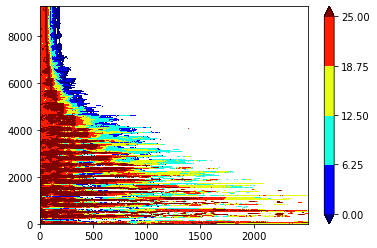

In [115]:
clr=np.linspace(0,25,5)
cb=plt.contourf(data_dbz,clr,cmap='jet',extend='both')
plt.colorbar(cb)

In [116]:
b=1.4
a=300

In [117]:
z=data_dbz.copy()

In [118]:
R=(z/a)**(1/b)

<ipython-input-118-9a80094191a8>:1: RuntimeWarning: invalid value encountered in power
  R=(z/a)**(1/b)


In [119]:
filename = 'MDV-20150805-084449-PPIVol.nc'
radar = pyart.io.read(filename)
display = pyart.graph.RadarMapDisplay(radar)

In [132]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])

In [135]:
data_lat=datafile.variables['latitude'][:].data
data_lon=datafile.variables['longitude'][:].data

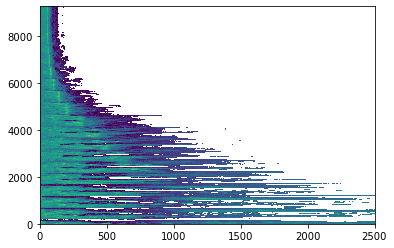

In [138]:
plt.pcolormesh(R)

In [145]:
R.shape

(9270, 2500)

AttributeError: 'numpy.ndarray' object has no attribute 'Longitude'

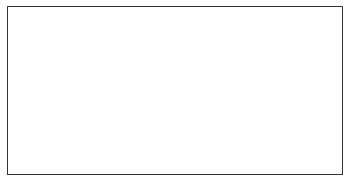

In [156]:

plt.figure()
axes = plt.axes(projection=ccrs.PlateCarree())
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
axes.contourf(R.Longitude,R.Latitude,R,transform=ccrs.PlateCarree(),levels=np.arange(0,100,5),cmap='jet')
#axes.set_xticks([60,70,80,90,100,110,120], crs=ccrs.PlateCarree())
#axes.set_yticks([0,10,20,30,40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)
#plt.ylim([0, 40])
#plt.xlim([60,120])
axes.coastlines()
plt.xlabel('Longitude[degree_east]')
plt.ylabel('Lattitude[degree_north]')
plt.title('LIS Flash Rate Climatology(HRFC_LIS_FR)')
plt.legend()
plt.show()

# Compute areas and colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.contourf(R)


NameError: name 'lon' is not defined

In [48]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

In [49]:
radar.longitude['data'][0],radar.latitude['data'][0]

(73.86896514892578, 18.04290008544922)

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


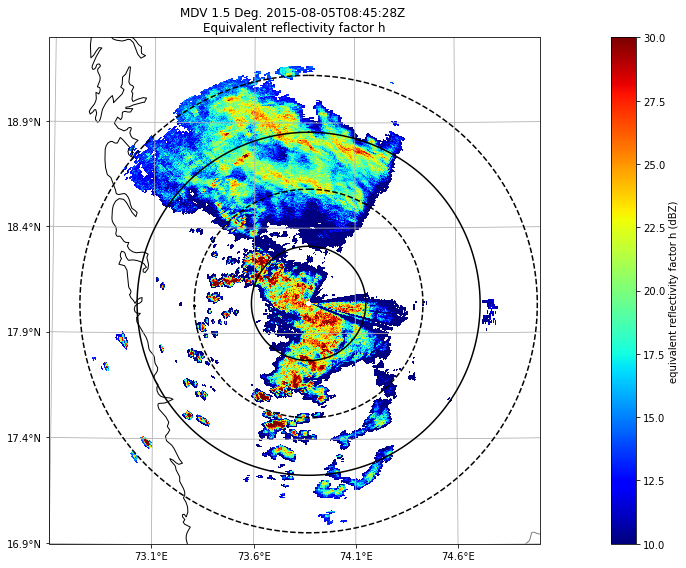

In [57]:
fig = plt.figure(figsize=[20,8])
df = display.plot_ppi_map('DBZH', 1, vmin=10, vmax=30,
                     min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')


# Plot range rings at 10, 20, 30, 40km
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')
# Plot cross hairs
#display.plot_line_xy(np.array([-120000.0, 120000.0]), np.array([0.0, 0.0]),
                     #line_style='k-')
#display.plot_line_xy(np.array([0.0, 0.0]), np.array([-20000.0, 200000.0]),
                     #line_style='k-')

# Indicate the radar location with a point
# display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])

fig.tight_layout()
plt.show()

In [16]:
R.shape

(9270, 2500)

In [29]:
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.091211,0.117677,0.125968,0.134045,0.141932,0.144522,0.164624,0.174310,0.149648,0.136694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.075109,0.112019,0.125968,0.131375,0.139323,0.141932,0.157207,0.167066,0.162167,0.162167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.084918,0.109146,0.117677,0.128683,0.139323,0.152184,0.149648,0.149648,0.162167,0.169495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.075109,0.103308,0.123229,0.141932,0.149648,0.167066,0.171909,0.171909,0.171909,0.183786,...,0.112019,0.112019,0.109146,0.114862,0.114862,0.117677,0.114862,NaN,0.112019,0.117677
4,0.084918,0.106243,0.123229,0.139323,0.164624,0.174310,0.162167,0.154704,0.159695,0.164624,...,NaN,0.114862,0.109146,0.112019,0.112019,0.112019,0.114862,0.123229,0.120466,0.109146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,0.084918,0.106243,0.114862,0.128683,0.131375,0.139323,0.147094,0.149648,0.144522,0.141932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9266,0.081701,0.106243,0.114862,0.139323,0.141932,0.157207,0.162167,0.152184,0.141932,0.139323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9267,0.078433,0.097335,0.112019,0.120466,0.128683,0.139323,0.144522,0.141932,0.144522,0.149648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9268,0.078433,0.097335,0.112019,0.125968,0.128683,0.141932,0.144522,0.144522,0.147094,0.149648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
(pd.DataFrame(R)).to_csv('Rainfall_rate.csv')

Text(0.5, 1.0, 'Rainrate')

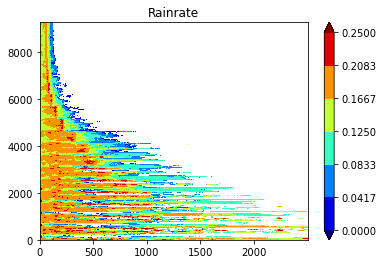

In [31]:
clr_rb=np.linspace(0,0.25,7)
rb=plt.contourf(R,clr_rb,cmap='jet',extend='both')
plt.colorbar(rb)
plt.title('Rainrate')

In [34]:
display = pyart.graph.RadarDisplay(radar)

In [100]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

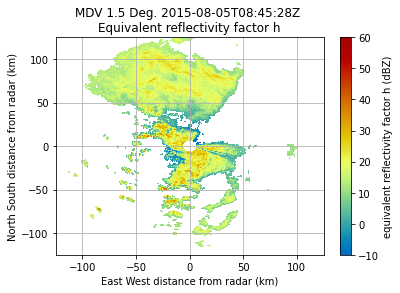

In [36]:
fig1 = display.plot('DBZH', sweep=1, vmin=-10, vmax=60)
plt.grid()

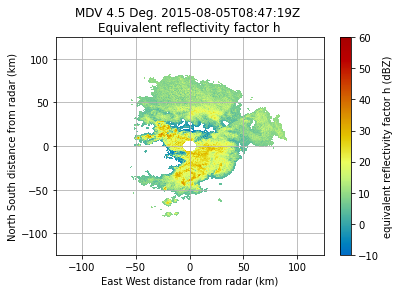

In [37]:
display.plot('DBZH', sweep=4, vmin=-10, vmax=60)
plt.grid()

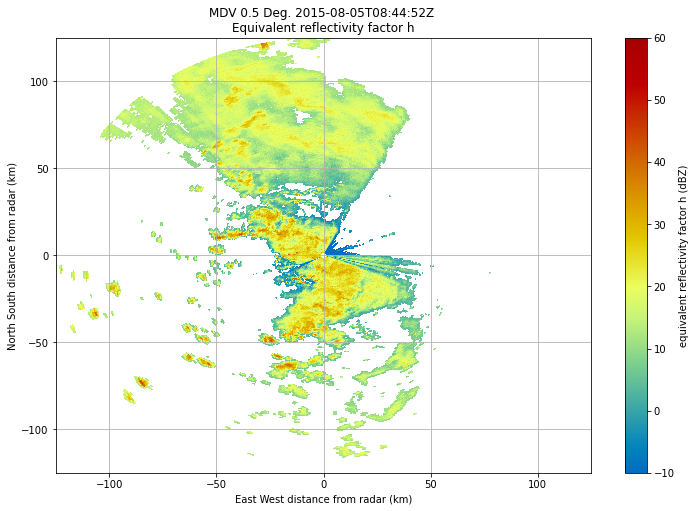

In [38]:
fig = plt.figure(figsize=[12,8])
display.plot('DBZH', sweep=0, vmin=-10, vmax=60)
plt.grid()


In [41]:
radar.longitude['data'][0],radar.latitude['data'][0]

(73.86896514892578, 18.04290008544922)

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


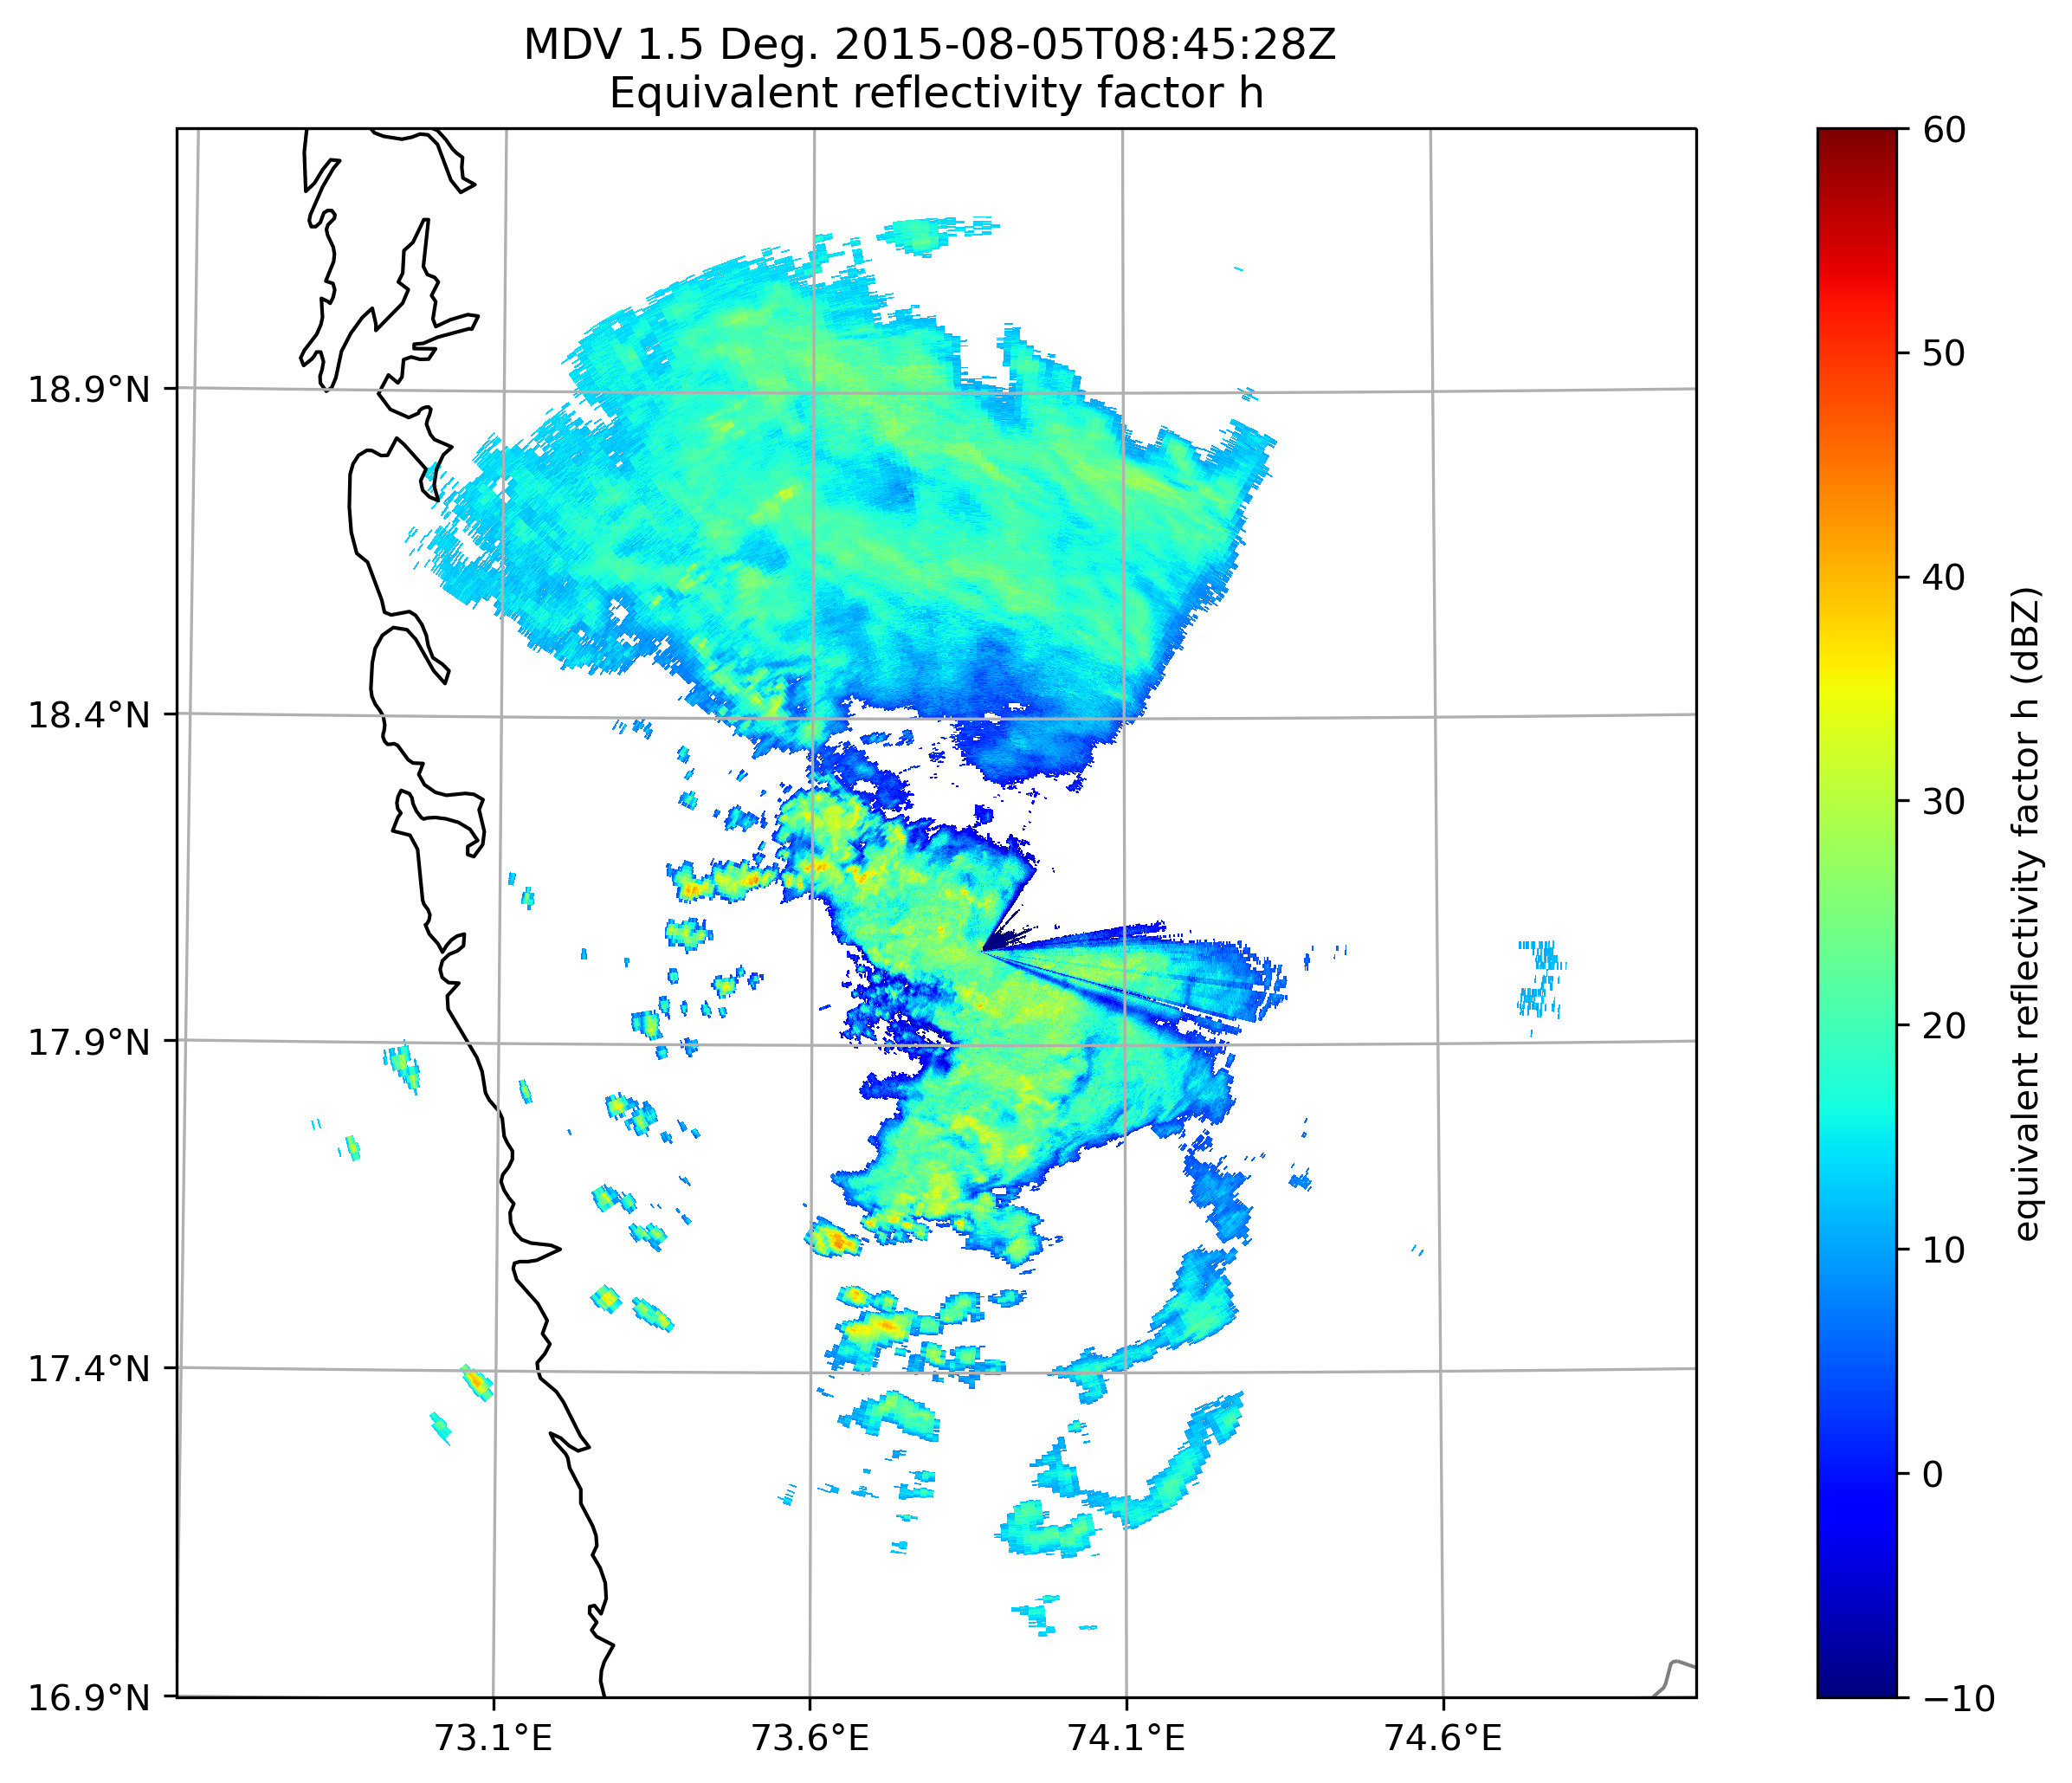

In [99]:
fig = plt.figure(figsize=[12,8],dpi=300)
display.plot_ppi_map('DBZH', 1, vmin=-10, vmax=60,
                     min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')
plt.show()

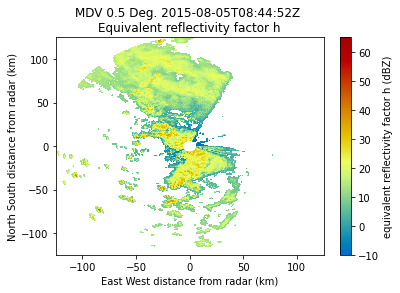

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
display.plot('DBZH')
plt.show()

In [ ]:
#masked=datafile.variables['DBZH'][:].mask

In [ ]:
#=data_dbz*masked

In [ ]:
#plt.contourf(c)

In [ ]:
#c

In [ ]:
#c.shape

In [ ]:
#pd.DataFrame(c)

In [ ]:
#c[c==-32768]=np.nan

In [ ]:
#((pd.DataFrame(c)).min()).max()

In [ ]:
#cb=plt.contourf(c)
#plt.colorbar(cb)